In [1]:
#Import Libraries,Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There is no null values in the dataset

Data Distribution

In [9]:
cat_variables = df[['rank','discipline','sex']]

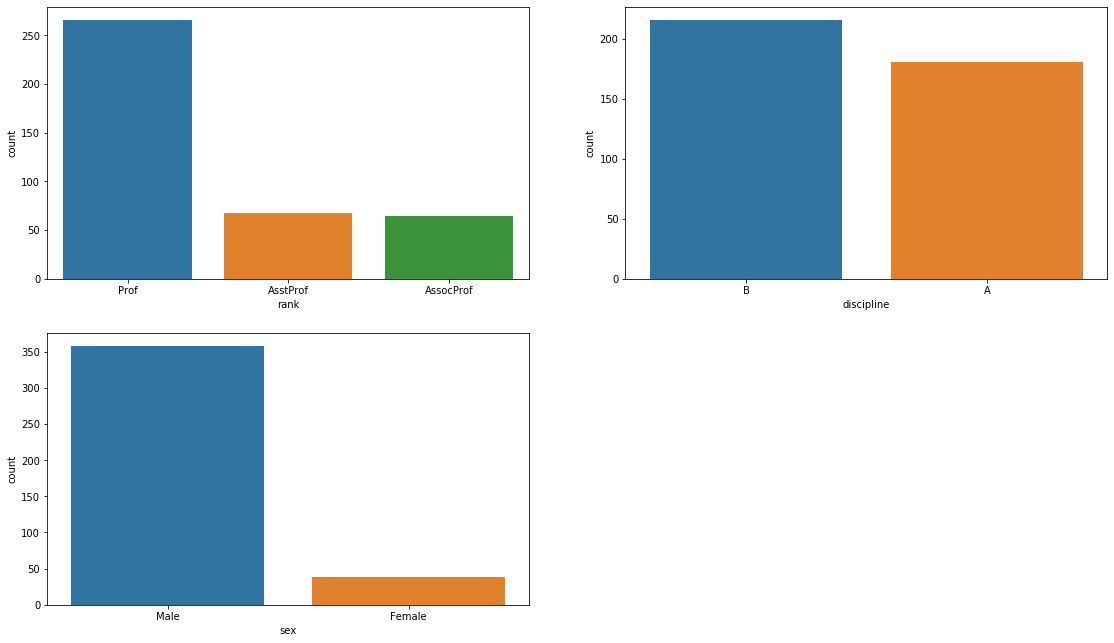

In [10]:
plt.figure(figsize=(19,11),facecolor='white')
plotnumber=1
for i in cat_variables:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(df[i])
    plotnumber+=1
plt.show()

In [11]:
print(df['rank'].value_counts())
print(df['discipline'].value_counts())
print(df['sex'].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [12]:
numeric_variables = df[['yrs.since.phd','yrs.service','salary']]

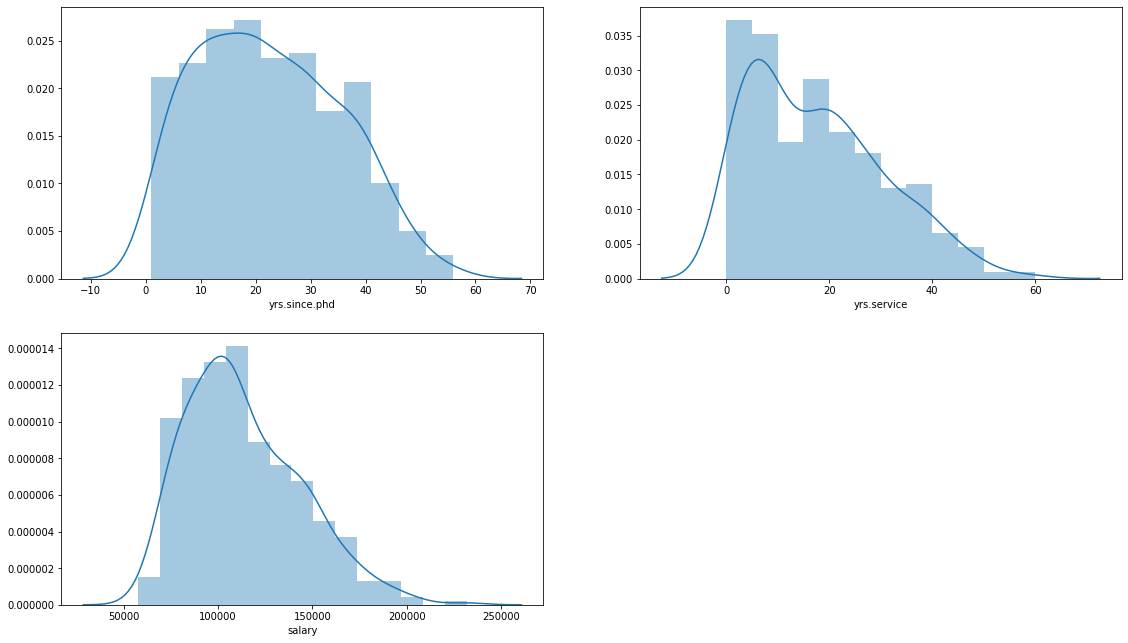

In [13]:
plt.figure(figsize=(19,11),facecolor='white')
plotnumber=1
for i in numeric_variables:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1
plt.show()

Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for f in cat_variables:
    df[f] = le.fit_transform(df[f])
    df[f]

In [17]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


Correlation Matrix

In [18]:
c = df.corr()
c

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


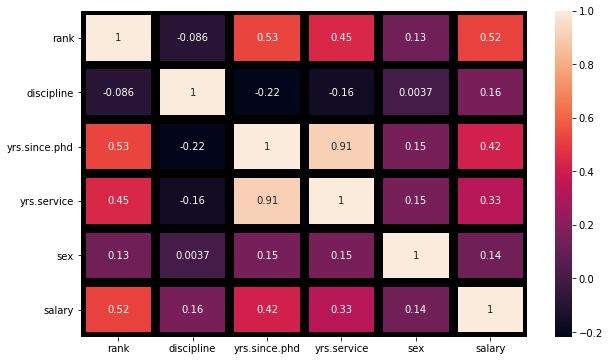

In [19]:
plt.figure(figsize=(10,6));
sns.heatmap(c,annot=True,linecolor='black',linewidths=8);

In [20]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Check for Outliers

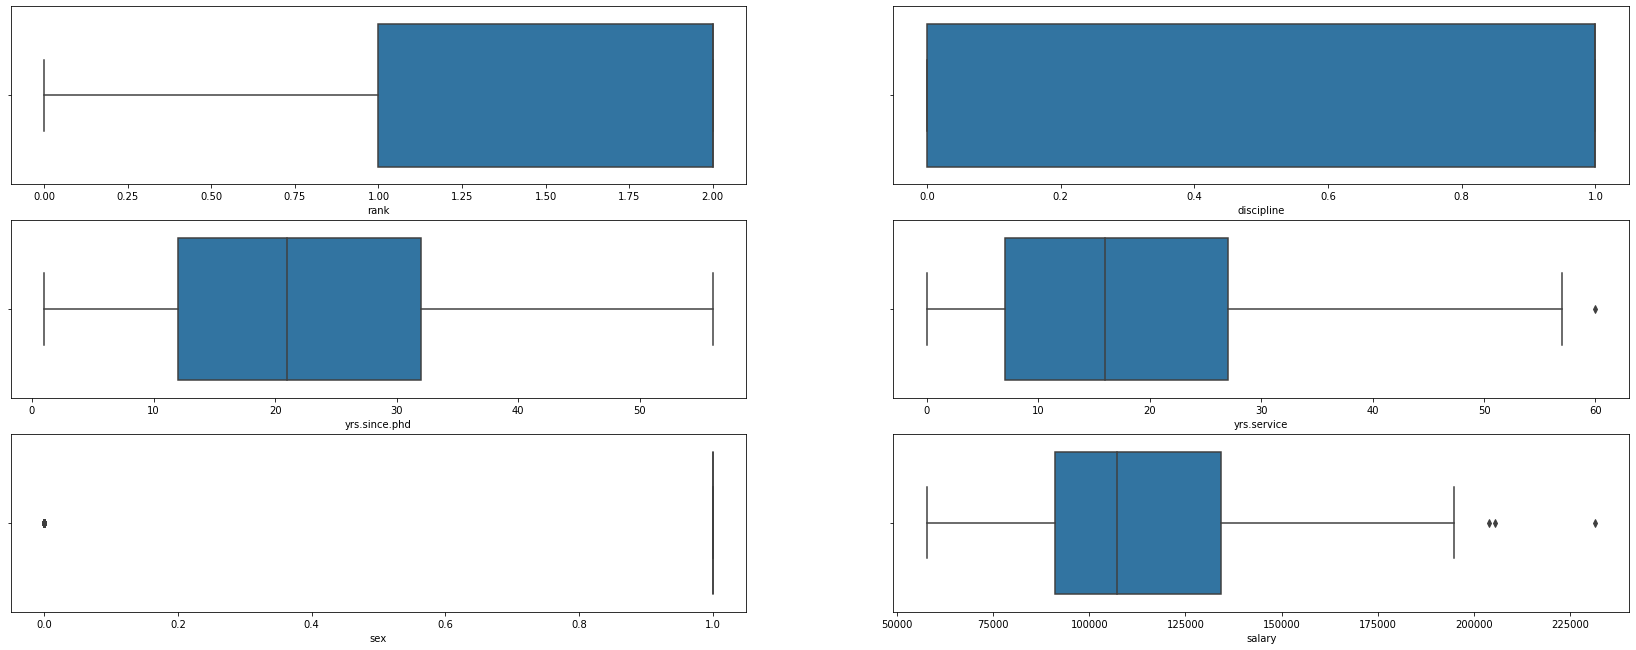

In [21]:
plt.figure(figsize=(29,19),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1 
plt.show()

In [22]:
print(df['salary'].quantile(0.90))

df['salary'] = np.where(df['salary'] >152946.00000000003,152946.00000000003,df['salary'])

152946.00000000003


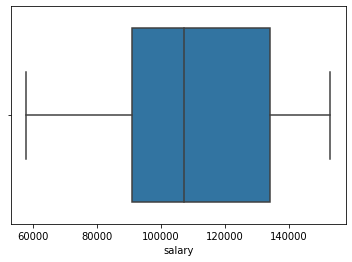

In [23]:
sns.boxplot(df['salary'])

In [24]:
print(df['yrs.service'].quantile(0.90))

df['yrs.service'] = np.where(df['yrs.service'] >37.0,37.0,df['yrs.service'])

37.0


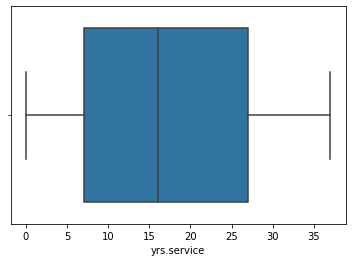

In [25]:
sns.boxplot(df['yrs.service'])

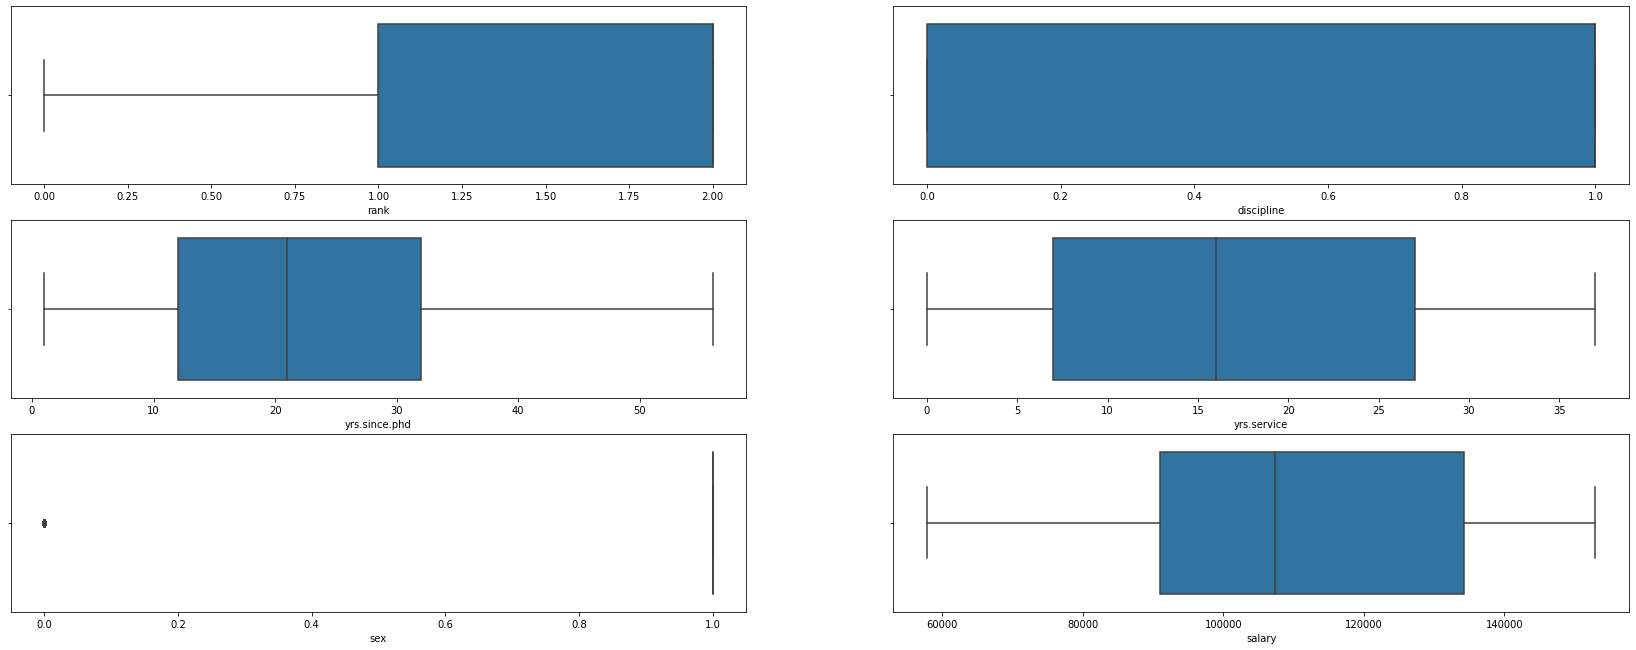

In [26]:
plt.figure(figsize=(29,19),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

In [27]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.311156
sex             -2.709958
salary           0.166029
dtype: float64

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt = PowerTransformer(method='yeo-johnson')

In [30]:
df = pt.fit_transform(df.values)
df

array([[ 0.69005113,  0.91540317, -0.12729454,  0.26115986,  0.3300584 ,
         1.07190476],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10475414,  0.3300584 ,
         1.49914244],
       [-1.09153554,  0.91540317, -1.62812069, -1.30682156,  0.3300584 ,
        -1.26937935],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.75173836,  0.3300584 ,
        -0.31618284],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02307242,  0.3300584 ,
        -0.57989602],
       [-1.09153554, -1.09241483, -1.13497737, -1.14950121,  0.3300584 ,
        -1.20957098]])

In [31]:
 df = pd.DataFrame(df)

In [32]:
df.columns = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [33]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.690051,0.915403,-0.127295,0.261160,0.330058,1.071905
1,0.690051,0.915403,-0.049178,0.104754,0.330058,1.499142
2,-1.091536,0.915403,-1.628121,-1.306822,0.330058,-1.269379
3,0.690051,0.915403,1.565162,1.457094,0.330058,0.199144
4,0.690051,0.915403,1.279680,1.457094,0.330058,1.129932
...,...,...,...,...,...,...
392,0.690051,-1.092415,0.854260,1.062187,0.330058,-0.261208
393,0.690051,-1.092415,0.726155,0.336251,0.330058,1.423724
394,0.690051,-1.092415,1.395525,0.751738,0.330058,-0.316183
395,0.690051,-1.092415,0.320172,0.023072,0.330058,-0.579896


# Model Building

In [34]:
X = df.drop(['salary'],axis=1)
y = df['salary']

In [35]:
X.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.690051,0.915403,-0.127295,0.261160,0.330058
1,0.690051,0.915403,-0.049178,0.104754,0.330058
2,-1.091536,0.915403,-1.628121,-1.306822,0.330058
3,0.690051,0.915403,1.565162,1.457094,0.330058
4,0.690051,0.915403,1.279680,1.457094,0.330058


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=200)

In [96]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989

In [97]:
import statsmodels.api as sm

In [98]:
result = sm.OLS(y,X).fit()

In [99]:
result

In [100]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              71.81
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    3.12e-53
Time:                        22:13:51   Log-Likelihood:                         -434.25
No. Observations:                 397   AIC:                                      878.5
Df Residuals:                     392   BIC:                                      898.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gbt = GradientBoostingRegressor()
gbt.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989

In [107]:
import xgboost

In [108]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989

In [109]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [67]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [68]:
Cv_rfc = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
Cv_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [110]:
Cv_rfc.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [112]:
rf = RandomForestRegressor(bootstrap=True,max_depth=100,max_features= 2, min_samples_leaf= 3,min_samples_split= 12,n_estimators= 200,random_state=42)
rf.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[ 0.14341519 -0.97977276  0.63402654  0.57310755  0.64435881  0.16405183
 -0.63121697  0.5528645   0.53564194  0.27201246  0.05206053  0.26736297
  0.78823382 -0.79406167  0.21588867  0.17997898  0.42241575 -1.07621088
  0.28598586 -0.58562587  0.62058532  0.68032093  0.42536421  0.76940525
 -1.33629241 -0.83611199  0.57624133 -0.98872398  0.66735679  0.19466092
  0.93890873  0.72277145  0.66761686 -0.49600987 -0.82348249 -0.60395477
 -0.64698302  0.20807425  0.62845032  0.54821697  0.3043833   0.17638546
 -0.85525304  0.18882487  0.64207319 -0.63121697 -1.24998961  0.67635272
 -0.64698302 -0.015633    0.32436737  0.6049138   0.61884103  0.22317485
  0.27508651  0.56989637  0.04648617 -0.75911283  0.18882487 -0.82348249
 -1.0512514  -0.94187303 -0.58171006  0.53566839  0.34611418 -0.38973452
 -0.98249484 -0.86907307 -0.57667465  0.6646904   0.02385356 -0.46302724
  0.14632581 -0.85525304  0.25605709  0.31364262  0.15989722 -0.78265147
  0.69295555  0.05685679  0.71767566  0.77741263 -1

0.5087639552519989